You can order print and ebook versions of *Think Python 3e* from
[Bookshop.org](https://bookshop.org/a/98697/9781098155438) and
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325).

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');

import thinkpython

# Lists

This chapter presents one of Python's most useful built-in types, lists.
You will also learn more about objects and what can happen when multiple variables refer to the same object.

In the exercises at the end of the chapter, we'll make a word list and use it to search for special words like palindromes and anagrams.

## A list is a sequence

Like a string, a **list** is a sequence of values. In a string, the
values are characters; in a list, they can be any type.
The values in a list are called **elements**.

There are several ways to create a new list; the simplest is to enclose the elements in square brackets (`[` and `]`).
For example, here is a list of two integers.

In [10]:
numbers = [42, 123]

And here's a list of three strings.

In [11]:
cheeses = ['Cheddar', 'Edam', 'Gouda']

The elements of a list don't have to be the same type.
The following list contains a string, a float, an integer, and even another list.

In [12]:
t = ['spam', 2.0, 5, [10, 20]]

In [15]:
len(t)

4

A list within another list is **nested**.

A list that contains no elements is called an empty list; you can create
one with empty brackets, `[]`.

In [13]:
empty = []

The `len` function returns the length of a list.

In [14]:
len(cheeses)

3

The length of an empty list is `0`.

In [7]:
len(empty)

0

The following figure shows the state diagram for `cheeses`, `numbers` and `empty`.

In [8]:
from diagram import make_list, Binding, Value

list1 = make_list(cheeses, dy=-0.3, offsetx=0.17)
binding1 = Binding(Value('cheeses'), list1)

list2 = make_list(numbers, dy=-0.3, offsetx=0.17)
binding2 = Binding(Value('numbers'), list2)

list3 = make_list(empty, dy=-0.3, offsetx=0.1)
binding3 = Binding(Value('empty'), list3)

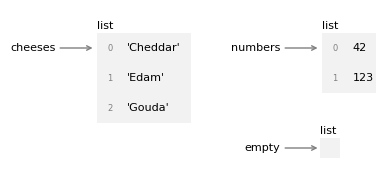

In [9]:
from diagram import diagram, adjust, Bbox

width, height, x, y = [3.66, 1.58, 0.45, 1.2]
ax = diagram(width, height)
bbox1 = binding1.draw(ax, x, y)
bbox2 = binding2.draw(ax, x+2.25, y)
bbox3 = binding3.draw(ax, x+2.25, y-1.0)

bbox = Bbox.union([bbox1, bbox2, bbox3])
#adjust(x, y, bbox)

Lists are represented by boxes with the word "list" outside and the numbered elements of the list inside.

## Lists are mutable

To read an element of a list, we can use the bracket operator.
The index of the first element is `0`.

In [16]:
cheeses[0]

'Cheddar'

In [17]:
cheeses[0][0]

'C'

Unlike strings, lists are mutable. When the bracket operator appears on
the left side of an assignment, it identifies the element of the list
that will be assigned.

In [18]:
numbers

[42, 123]

In [19]:
numbers[1] = 17
numbers

[42, 17]

The second element of `numbers`, which used to be `123`, is now `17`.

List indices work the same way as string indices:

-   Any integer expression can be used as an index.

-   If you try to read or write an element that does not exist, you get
    an `IndexError`.

-   If an index has a negative value, it counts backward from the end of
    the list.

The `in` operator works on lists -- it checks whether a given element appears anywhere in the list.

In [20]:
'Edam' in cheeses

True

In [21]:
'Wensleydale' in cheeses

False

In [22]:
'dam' in cheeses

False

Although a list can contain another list, the nested list still counts as a single element -- so in the following list, there are only four elements.

In [23]:
t = ['spam', 2.0, 5, [10, 20]]
len(t)

4

And `10` is not considered to be an element of `t` because it is an element of a nested list, not `t`.

In [24]:
10 in t

False

## List slices

The slice operator works on lists the same way it works on strings.
The following example selects the second and third elements from a list of four letters.

In [25]:
letters = ['a', 'b', 'c', 'd']
letters[1:3]

['b', 'c']

In [29]:
letters[1:2] = ['e', 'f']
letters

['a', 'e', 'f', 'c', 'd']

In [30]:
letters[3:] = []
letters

['a', 'e', 'f']

In [31]:
letters[3:] = ['b', 'c', 'd', 'z']

In [32]:
letters

['a', 'e', 'f', 'b', 'c', 'd', 'z']

If you omit the first index, the slice starts at the beginning.

In [26]:
letters[:2]

['a', 'b']

If you omit the second, the slice goes to the end.

In [27]:
letters[2:]

['c', 'd']

So if you omit both, the slice is a copy of the whole list.

In [28]:
letters[:]

['a', 'b', 'c', 'd']

Another way to copy a list is to use the `list` function.

In [33]:
list(letters)

['a', 'e', 'f', 'b', 'c', 'd', 'z']

Because `list` is the name of a built-in function, you should avoid using it as a variable name.


In [35]:
lst = [1, 2, 3, 4, 5]
lst = list([1, 2, 3, 4, 5])
lst

[1, 2, 3, 4, 5]

## List operations

The `+` operator concatenates lists.

In [36]:
t1 = [1, 2]
t2 = [3, 4]
t1 + t2

[1, 2, 3, 4]

In [40]:
t1[1:2] = [2, 3]
t1

[1, 2, 3]

In [41]:
t1 + [3]

[1, 2, 3, 3]

In [42]:
t1

[1, 2, 3]

The `*` operator repeats a list a given number of times.

In [43]:
['spam'] * 4

['spam', 'spam', 'spam', 'spam']

In [44]:
['spam', 'hello'] * 4

['spam', 'hello', 'spam', 'hello', 'spam', 'hello', 'spam', 'hello']

In [45]:
t1*4

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

In [46]:
t1

[1, 2, 3]

No other mathematical operators work with lists, but the built-in function `sum` adds up the elements.

In [47]:
sum(t1)

6

And `min` and `max` find the smallest and largest elements.

In [48]:
min(t1)

1

In [49]:
max(t2)

4

In [54]:
sum(['hello', 'goodbye', 'computer', 'coffee'])

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [53]:
max(['hello', 3, [20, 5]])

TypeError: '>' not supported between instances of 'int' and 'str'

## List methods

Python provides methods that operate on lists. For example, `append`
adds a new element to the end of a list:

In [55]:
letters.append('e')
letters

['a', 'e', 'f', 'b', 'c', 'd', 'z', 'e']

`extend` takes a list as an argument and appends all of the elements:

In [56]:
letters.append(['f', 'g'])
letters

['a', 'e', 'f', 'b', 'c', 'd', 'z', 'e', ['f', 'g']]

There are two methods that remove elements from a list.
If you know the index of the element you want, you can use `pop`.

In [59]:
t = ['a', 'b', 'c']
t.pop(1)

'b'

The return value is the element that was removed.
And we can confirm that the list has been modified.

In [60]:
t

['a', 'c']

If you know the element you want to remove (but not the index), you can use `remove`:

In [61]:
t = ['a', 'b', 'c']
t.remove('b')

The return value from `remove` is `None`.
But we can confirm that the list has been modified.

In [62]:
t

['a', 'c']

If the element you ask for is not in the list, that's a ValueError.

In [63]:
%%expect ValueError

t.remove('d')

ValueError: list.remove(x): x not in list

## Lists and strings

A string is a sequence of characters and a list is a sequence of values,
but a list of characters is not the same as a string.
To convert from a string to a list of characters, you can use the `list` function.

In [64]:
s = 'spam'
t = list(s)
t

['s', 'p', 'a', 'm']

The `list` function breaks a string into individual letters.
If you want to break a string into words, you can use the `split` method:

In [ ]:
s = 'pining      for the     ' \
'fjords'
t = s.split()
t

ValueError: empty separator

An optional argument called a **delimiter** specifies which characters to use as word boundaries. The following example uses a hyphen as a delimiter.

In [ ]:
s = 'ex-parrot'
t = s.split('-')
t

If you have a list of strings, you can concatenate them into a single string using `join`.
`join` is a string method, so you have to invoke it on the delimiter and pass the list as an argument.

In [74]:
delimiter = ' '
t = ['pining', 'for', 'the', 'fjords']
s = "-".join(t)
s

'pining-for-the-fjords'

In this case the delimiter is a space character, so `join` puts a space
between words.
To join strings without spaces, you can use the empty string, `''`, as a delimiter.

## Looping through a list

You can use a `for` statement to loop through the elements of a list.

In [75]:
for cheese in cheeses:
    print(cheese)

Cheddar
Edam
Gouda


For example, after using `split` to make a list of words, we can use `for` to loop through them.

In [76]:
s = 'pining for the fjords'

for word in s.split():
    print(len(word))

6
3
3
6


A `for` loop over an empty list never runs the indented statements.

In [ ]:
for x in []:
    print('This never happens.')

## Sorting lists

Python provides a built-in function called `sorted` that sorts the elements of a list.

In [77]:
scramble = ['c', 'a', 'b']
sorted(scramble)

['a', 'b', 'c']

The original list is unchanged.

In [78]:
scramble

['c', 'a', 'b']

`sorted` works with any kind of sequence, not just lists. So we can sort the letters in a string like this.

In [79]:
sorted('letters')

['e', 'e', 'l', 'r', 's', 't', 't']

The result is a list.
To convert the list to a string, we can use `join`.

In [80]:
''.join(sorted('letters'))

'eelrstt'

With an empty string as the delimiter, the elements of the list are joined with nothing between them.

## List comprehension

[element for element in sequence]

In [81]:
a = [1, 2, 3, 4]

[x for x in a]

[1, 2, 3, 4]

In [82]:
[x*x for x in a]

[1, 4, 9, 16]

In [83]:
b = "hello goodbye computer desk".split()
[len(x) for x in b]

[5, 7, 8, 4]

In [84]:
[''.join(reversed(x)) for x in b]

['olleh', 'eybdoog', 'retupmoc', 'ksed']

In [85]:
[s[0] for s in b]


['h', 'g', 'c', 'd']

In [ ]:
[s[0] == 'c' for s in b]

[x for x in lst if b]

In [86]:
a = [1, 2, 3, 4]

[x for x in a if x % 2 == 0]

[2, 4]

In [87]:
[x*x for x in a if x%2 == 0]

[4, 16]

In [89]:
b = "hello goodbye computer desk".split()
[s+s for s in b if len(s) > 5]

['goodbyegoodbye', 'computercomputer']

[result if predicate else otherResult for element in sequence]

In [93]:
[s+s if len(s) > 5  else '' for s in b]

['', 'goodbyegoodbye', 'computercomputer', '']

## Enumerate, zip

In [ ]:
i = 0
while True:
    do something
    if i > 5:
        break
    i += 1

i = 0
for x in lst:
    do something
    if i > 5
    break
    i += 1


In [96]:
b = "hello goodbye computer desk".split()
print(b)
print(list(enumerate(b)))

['hello', 'goodbye', 'computer', 'desk']
[(0, 'hello'), (1, 'goodbye'), (2, 'computer'), (3, 'desk')]


In [97]:
for i, s in enumerate(b):
    if i < 2:
        print(s + "-beginning")
    else:
        print(s + "_end")

hello-beginning
goodbye-beginning
computer_end
desk_end


In [98]:
x = [1, 2, 3, 4]
y = [5, 6, 7, 8]



In [99]:
z = []
for i in range(len(x)):
    z.append(x[i] + y[i])
z

[6, 8, 10, 12]

In [101]:
z = []
for xi, yi in zip(x, y):
    z.append(xi + yi)
z

[6, 8, 10, 12]

## Objects and values

If we run these assignment statements:

In [ ]:
a = 'banana'
b = 'banana'

We know that `a` and `b` both refer to a string, but we don't know whether they refer to the *same* string.
There are two possible states, shown in the following figure.

In [ ]:
from diagram import Frame, Stack

s = 'banana'
bindings = [Binding(Value(name), Value(repr(s))) for name in 'ab']
frame1 = Frame(bindings, dy=-0.25)

binding1 = Binding(Value('a'), Value(repr(s)), dy=-0.11)
binding2 = Binding(Value('b'), draw_value=False, dy=0.11)
frame2 = Frame([binding1, binding2], dy=-0.25)

stack = Stack([frame1, frame2], dx=1.7, dy=0)

In [ ]:
width, height, x, y = [2.85, 0.76, 0.17, 0.51]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
# adjust(x, y, bbox)

In the diagram on the left, `a` and `b` refer to two different objects that have the
same value. In the diagram on the right, they refer to the same object.
To check whether two variables refer to the same object, you can use the `is` operator.

In [ ]:
a = 'banana'
b = 'banana'
a is b

In this example, Python only created one string object, and both `a`
and `b` refer to it.
But when you create two lists, you get two objects.

In [ ]:
a = [1, 2, 3]
b = [1, 2, 3]
a is b

So the state diagram looks like this.

In [ ]:
t = [1, 2, 3]
binding1 = Binding(Value('a'), Value(repr(t)))
binding2 = Binding(Value('b'), Value(repr(t)))
frame = Frame([binding1, binding2], dy=-0.25)

In [ ]:
width, height, x, y = [1.16, 0.76, 0.21, 0.51]
ax = diagram(width, height)
bbox = frame.draw(ax, x, y)
# adjust(x, y, bbox)

In this case we would say that the two lists are **equivalent**, because they have the same elements, but not **identical**, because they are not the same object.
If two objects are identical, they are also equivalent, but if they are equivalent, they are not necessarily identical.

## Aliasing

If `a` refers to an object and you assign `b = a`, then both variables refer to the same object.

In [ ]:
a = [1, 2, 3]
b = a
b is a

So the state diagram looks like this.

In [ ]:
t = [1, 2, 3]
binding1 = Binding(Value('a'), Value(repr(t)), dy=-0.11)
binding2 = Binding(Value('b'), draw_value=False, dy=0.11)
frame = Frame([binding1, binding2], dy=-0.25)

In [ ]:
width, height, x, y = [1.11, 0.81, 0.17, 0.56]
ax = diagram(width, height)
bbox = frame.draw(ax, x, y)
# adjust(x, y, bbox)

The association of a variable with an object is called a **reference**.
In this example, there are two references to the same object.

An object with more than one reference has more than one name, so we say the object is **aliased**.
If the aliased object is mutable, changes made with one name affect the other.
In this example, if we change the object `b` refers to, we are also changing the object `a` refers to.

In [ ]:
b[0] = 5
a

So we would say that `a` "sees" this change.
Although this behavior can be useful, it is error-prone.
In general, it is safer to avoid aliasing when you are working with mutable objects.

For immutable objects like strings, aliasing is not as much of a problem.
In this example:

In [ ]:
a = 'banana'
b = 'banana'

It almost never makes a difference whether `a` and `b` refer to the same
string or not.

## List arguments

When you pass a list to a function, the function gets a reference to the
list. If the function modifies the list, the caller sees the change. For
example, `pop_first` uses the list method `pop` to remove the first element from a list.

In [ ]:
def pop_first(lst):
    return lst.pop(0)

We can use it like this.

In [ ]:
letters = ['a', 'b', 'c']
pop_first(letters)

The return value is the first element, which has been removed from the list -- as we can see by displaying the modified list.

In [ ]:
letters

In this example, the parameter `lst` and the variable `letters` are aliases for the same object, so the state diagram looks like this:

In [ ]:
lst = make_list('abc', dy=-0.3, offsetx=0.1)
binding1 = Binding(Value('letters'), draw_value=False)
frame1 = Frame([binding1], name='__main__', loc='left')

binding2 = Binding(Value('lst'), draw_value=False, dx=0.61, dy=0.35)
frame2 = Frame([binding2], name='pop_first', loc='left', offsetx=0.08)

stack = Stack([frame1, frame2], dx=-0.3, dy=-0.5)

In [ ]:
width, height, x, y = [2.04, 1.24, 1.06, 0.85]
ax = diagram(width, height)
bbox1 = stack.draw(ax, x, y)
bbox2 = lst.draw(ax, x+0.5, y)
bbox = Bbox.union([bbox1, bbox2])
adjust(x, y, bbox)

Passing a reference to an object as an argument to a function creates a form of aliasing.
If the function modifies the object, those changes persist after the function is done.

## Making a word list

In the previous chapter, we read the file `words.txt` and searched for words with certain properties, like using the letter `e`.
But we read the entire file many times, which is not efficient.
It is better to read the file once and put the words in a list.
The following loop shows how.

In [104]:
download('https://raw.githubusercontent.com/AllenDowney/ThinkPython/v3/words.txt');

In [ ]:
word_list = []

for line in open('words.txt'):
    word = line.strip()
    word_list.append(word)

len(word_list)

113783

In [114]:
word_list[60000]

'merls'

In [113]:
word_list = []

f = open("words.txt")
word_list = [w.strip() for w in f.readlines()]

len(word_list)

113783

In [111]:
word_list = [w.strip() for w in word_list]

Before the loop, `word_list` is initialized with an empty list.
Each time through the loop, the `append` method adds a word to the end.
When the loop is done, there are more than 113,000 words in the list.

Another way to do the same thing is to use `read` to read the entire file into a string.

In [115]:
string = open('words.txt').read()
len(string)

1016511

In [116]:
len([c for c in string if c == '\n'])

113783

In [117]:
len(string) - len(string.replace("\n", ''))

113783

In [119]:
import re
pattern = "\n"
len(re.findall(pattern, string))

113783

The result is a single string with more than a million characters.
We can use the `split` method to split it into a list of words.

In [120]:
word_list = string.split()
len(word_list)

113783

Now, to check whether a string appears in the list, we can use the `in` operator.
For example, `'demotic'` is in the list.

In [121]:
'demotic' in word_list

True

But `'contrafibularities'` is not.

In [122]:
'contrafibularities' in word_list

False

And I have to say, I'm anaspeptic about it.

## Debugging

Note that most list methods modify the argument and return `None`.
This is the opposite of the string methods, which return a new string and leave the original alone.

If you are used to writing string code like this:

In [ ]:
word = 'plumage!'
word = word.strip('!')
word

It is tempting to write list code like this:

In [ ]:
t = [1, 2, 3]
t = t.remove(3)           # WRONG!

`remove` modifies the list and returns `None`, so next operation you perform with `t` is likely to fail.

In [ ]:
%%expect AttributeError

t.remove(2)

This error message takes some explaining.
An **attribute** of an object is a variable or method associated with it.
In this case, the value of `t` is `None`, which is a `NoneType` object, which does not have a attribute named `remove`, so the result is an `AttributeError`.

If you see an error message like this, you should look backward through the program and see if you might have called a list method incorrectly.

## Glossary

**list:**
 An object that contains a sequence of values.

**element:**
 One of the values in a list or other sequence.

**nested list:**
A list that is an element of another list.

**delimiter:**
 A character or string used to indicate where a string should be split.

**equivalent:**
 Having the same value.

**identical:**
 Being the same object (which implies equivalence).

**reference:**
 The association between a variable and its value.

**aliased:**
If there is more than one variable that refers to an object, the object is aliased.

**attribute:**
 One of the named values associated with an object.

## Exercises



In [ ]:
# This cell tells Jupyter to provide detailed debugging information
# when a runtime error occurs. Run it before working on the exercises.

%xmode Verbose

### Ask a virtual assistant

In this chapter, I used the words "contrafibularities" and "anaspeptic", but they are not actually English words.
They were used in the British television show *Black Adder*, Season 3, Episode 2, "Ink and Incapability".

However, when I asked ChatGPT 3.5 (August 3, 2023 version) where those words came from, it initially claimed they are from Monty Python, and later claimed they are from the Tom Stoppard play *Rosencrantz and Guildenstern Are Dead*.

If you ask now, you might get different results.
But this example is a reminder that virtual assistants are not always accurate, so you should check whether the results are correct.
As you gain experience, you will get a sense of which questions virtual assistants can answer reliably.
In this example, a conventional web search can identify the source of these words quickly.

If you get stuck on any of the exercises in this chapter, consider asking a virtual assistant for help.
If you get a result that uses features we haven't learned yet, you can assign the VA a "role".

For example, before you ask a question try typing "Role: Basic Python Programming Instructor".
After that, the responses you get should use only basic features.
If you still see features we you haven't learned, you can follow up with "Can you write that using only basic Python features?"

### Exercise

Two words are anagrams if you can rearrange the letters from one to spell the other.
For example, `tops` is an anagram of `stop`.

One way to check whether two words are anagrams is to sort the letters in both words.
If the lists of sorted letters are the same, the words are anagrams.

Write a function called `is_anagram` that takes two strings and returns `True` if they are anagrams.

To get you started, here's an outline of the function with doctests.

In [102]:
def is_anagram(word1, word2):
    """Checks whether two words are anagrams.

    >>> is_anagram('tops', 'stop')
    True
    >>> is_anagram('skate', 'takes')
    True
    >>> is_anagram('tops', 'takes')
    False
    >>> is_anagram('skate', 'stop')
    False
    """
    if sorted(word1) == sorted(word2):
        return True
    else:
        return False

In [ ]:
# Solution goes here

You can use `doctest` to test your function.

In [103]:
from doctest import run_docstring_examples

def run_doctests(func):
    run_docstring_examples(func, globals(), name=func.__name__)

run_doctests(is_anagram)

Using your function and the word list, find all the anagrams of `takes`.

In [123]:
# Solution goes here
for word in word_list:
    if is_anagram('takes', word):
        print(word)

skate
stake
steak
takes
teaks


In [124]:
print([w for w in word_list if is_anagram("takes", w)])

['skate', 'stake', 'steak', 'takes', 'teaks']


### Exercise

Python provides a built-in function called `reversed` that takes as an argument a sequence of elements -- like a list or string -- and returns a `reversed` object that contains the elements in reverse order.

In [125]:
reversed('parrot')

If you want the reversed elements in a list, you can use the `list` function.

In [126]:
list(reversed('parrot'))

['t', 'o', 'r', 'r', 'a', 'p']

Or if you want them in a string, you can use the `join` method.

In [127]:
''.join(reversed('parrot'))

'torrap'

So we can write a function that reverses a word like this.

In [130]:
def reverse_word(word):
    return ''.join(reversed(word))

A palindrome is a word that is spelled the same backward and forward, like "noon" and "rotator".
Write a function called `is_palindrome` that takes a string argument and returns `True` if it is a palindrome and `False` otherwise.

Here's an outline of the function with doctests you can use to check your function.

In [131]:
def is_palindrome(word):
    """Check if a word is a palindrome.

    >>> is_palindrome('bob')
    True
    >>> is_palindrome('alice')
    False
    >>> is_palindrome('a')
    True
    >>> is_palindrome('')
    True
    """
    return word == reverse_word(word)

In [ ]:
# Solution goes here

In [132]:
run_doctests(is_palindrome)

You can use the following loop to find all of the palindromes in the word list with at least 7 letters.

In [133]:
for word in word_list:
    if len(word) >= 7 and is_palindrome(word):
        print(word)

deified
halalah
reifier
repaper
reviver
rotator
sememes


### Exercise

Write a function called `reverse_sentence` that takes as an argument a string that contains any number of words separated by spaces.
It should return a new string that contains the same words in reverse order.
For example, if the argument is "Reverse this sentence", the result should be "Sentence this reverse".

Hint: You can use the `capitalize` methods to capitalize the first word and convert the other words to lowercase.

To get you started, here's an outline of the function with doctests.

In [136]:
def reverse_sentence(input_string):
    '''Reverse the words in a string and capitalize the first.

    >>> reverse_sentence('Reverse this sentence.')
    'Sentence this reverse.'

    >>> reverse_sentence('Python?')
    'Python'

    >>> reverse_sentence('')
    ''

    >>> reverse_sentence('One for all and all for one!')
    'One for all and all for one!'
    '''
    return " ".join(reversed(input_string[:-1].split())).lower().capitalize() + input_string[-1]

In [137]:
# Solution goes here
reverse_sentence("Reverse this string!")

'String this reverse!'

In [ ]:
run_doctests(reverse_sentence)

### Exercise

Write a function called `total_length` that takes a list of strings and returns the total length of the strings.
The total length of the words in `word_list` should be $902{,}728$.

In [ ]:
# Solution goes here

In [139]:
total_length(word_list)

902728

In [138]:
def total_length(word_list):
    return sum(len(word) for word in word_list)

[Think Python: 3rd Edition](https://allendowney.github.io/ThinkPython/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

Code license: [MIT License](https://mit-license.org/)

Text license: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)